<a href="https://colab.research.google.com/github/RajChanda/Machine-Learning-Projects/blob/main/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [5]:
print(train_label[0])

9


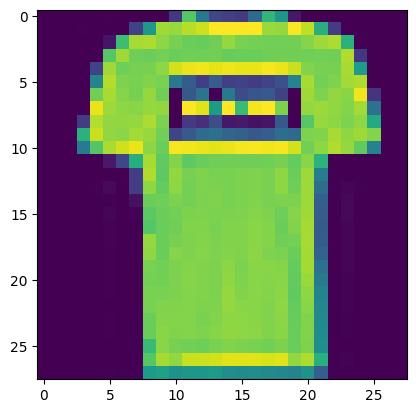

In [6]:
plt.imshow(train_data[1])

Text(0.5, 1.0, '0')

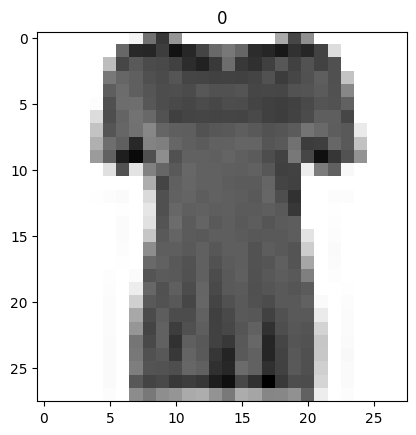

In [7]:
idx = 10
plt.imshow(train_data[idx], cmap = plt.cm.binary)
plt.title(train_label[idx])

In [8]:
# building a multiclass classification model

Similar architechture to binary classification
1. input shape = 28x28
2. output shape = 10 (one per class of clothing)
3. loss function = tf.keras.losses.CategoricalCrossentropy
4. output layer activation = Softmax


If the labels are one_hot encoded,use SparseCategoricalCrossentropy().

In [15]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax),
])

model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

non_norm_history_1 = model_1.fit(train_data,
                                 tf.one_hot(train_label, depth = 10),
                                 epochs = 10,
                                 validation_data = (test_data, tf.one_hot(test_label, depth = 10)))



Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4157 - accuracy: 0.1254 - val_loss: 2.2108 - val_accuracy: 0.1385
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9573 - accuracy: 0.1945 - val_loss: 1.7893 - val_accuracy: 0.2648
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7213 - accuracy: 0.2584 - val_loss: 1.6749 - val_accuracy: 0.2827
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6630 - accuracy: 0.2765 - val_loss: 1.6438 - val_accuracy: 0.2732
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6371 - accuracy: 0.2776 - val_loss: 1.6381 - val_accuracy: 0.2898
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6240 - accuracy: 0.2829 - val_loss: 1.6128 - val_accuracy: 0.2848
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6112 - accuracy: 0.2839 - val_loss: 1.6107 - val_accuracy:

In [16]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 4)                 3140      
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# check the min max of the train data

train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled(normalized). i.e. they should be between 0 and 1

In [18]:
train_data_norm = train_data/255
test_data_norm = test_data/255

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [21]:
model_1_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax),
])

model_1_norm.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

norm_history = model_1_norm.fit(train_data_norm,
                                 tf.one_hot(train_label, depth = 10),
                                 epochs = 10,
                                 validation_data = (test_data_norm, tf.one_hot(test_label, depth = 10)))



Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2033 - accuracy: 0.5801 - val_loss: 0.8541 - val_accuracy: 0.7221
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7223 - accuracy: 0.7560 - val_loss: 0.6877 - val_accuracy: 0.7643
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6279 - accuracy: 0.7767 - val_loss: 0.6385 - val_accuracy: 0.7739
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5953 - accuracy: 0.7866 - val_loss: 0.6491 - val_accuracy: 0.7698
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5792 - accuracy: 0.7911 - val_loss: 0.6043 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5680 - accuracy: 0.7949 - val_loss: 0.6019 - val_accuracy: 0.7899
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5567 - accuracy: 0.8000 - val_loss: 0.6089 - val_accuracy:

<Axes: title={'center': 'Normalised Data'}>

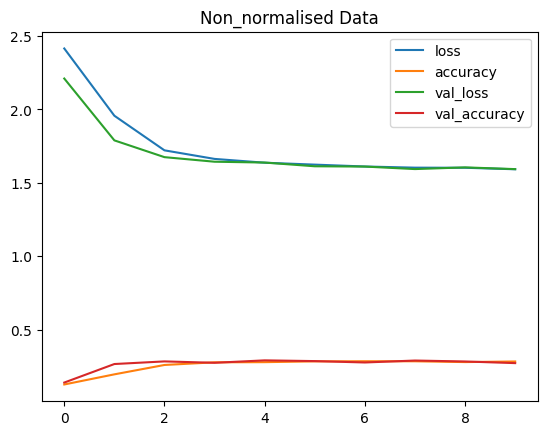

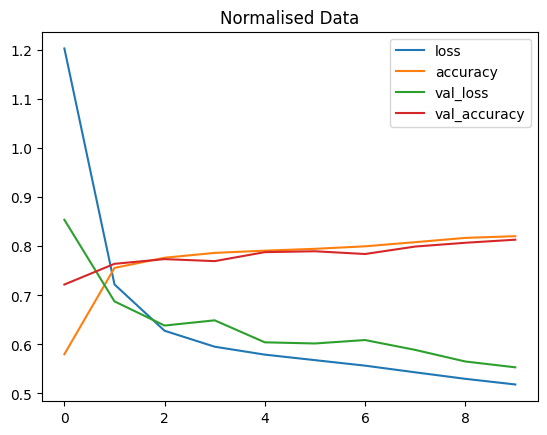

In [22]:
pd.DataFrame(non_norm_history_1.history).plot(title = "Non_normalised Data")
pd.DataFrame(norm_history.history).plot(title = "Normalised Data")

Finding the ideal learning rate

In [25]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax),
])

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3* 10**(epoch/20))

r = model_2.fit(train_data_norm,
                tf.one_hot(train_label, depth = 10),
                epochs = 40,
                validation_data = (test_data_norm, tf.one_hot(test_label, depth = 10)),
                callbacks = [lr_scheduler])



Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5763 - accuracy: 0.3721 - val_loss: 1.3844 - val_accuracy: 0.4203 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3369 - accuracy: 0.4379 - val_loss: 1.2713 - val_accuracy: 0.5143 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1378 - accuracy: 0.5443 - val_loss: 1.0708 - val_accuracy: 0.5733 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0366 - accuracy: 0.5772 - val_loss: 1.0170 - val_accuracy: 0.5861 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9826 - accuracy: 0.6071 - val_loss: 0.9553 - val_accuracy: 0.6231 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8426 - accuracy: 0.6472 - val_loss: 0.8013 - val_accuracy: 0.6816 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Learning rate vs Loss')

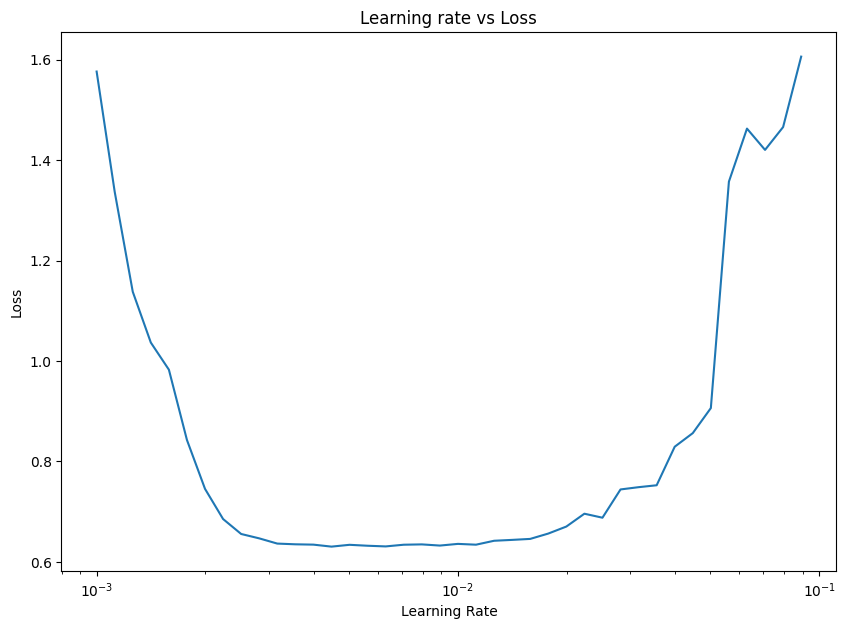

In [30]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, r.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [33]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax),
])

model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
                metrics = ["accuracy"])

r = model_3.fit(train_data_norm,
                tf.one_hot(train_label, depth = 10),
                epochs = 20,
                validation_data = (test_data_norm, tf.one_hot(test_label, depth = 10)))



Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0466 - accuracy: 0.5903 - val_loss: 0.8683 - val_accuracy: 0.6753
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8390 - accuracy: 0.6871 - val_loss: 0.8086 - val_accuracy: 0.6997
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8103 - accuracy: 0.7008 - val_loss: 0.7877 - val_accuracy: 0.7097
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7960 - accuracy: 0.7067 - val_loss: 0.8098 - val_accuracy: 0.6942
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7878 - accuracy: 0.7087 - val_loss: 0.8116 - val_accuracy: 0.6928
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7860 - accuracy: 0.7102 - val_loss: 0.8143 - val_accuracy: 0.7084
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7727 - accuracy: 0.7179 - val_loss: 0.8015 - val_accuracy: